### 載入所需套件

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

### kaggle資料及匯入並檢查空值

In [3]:
data_train = pd.read_csv('./dataset/house/train_users.csv',parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
data_test = pd.read_csv('./dataset/house/test_users.csv',parse_dates=['timestamp_first_active','date_account_created','date_first_booking'])
data_train.head()
#載入資料
#取出時間資料

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
def null_in_data(a):
    print(a.isnull().sum())
    print('\n缺失值加總:' , a.isnull().sum().values.sum() ,'\n')
null_in_data(data_test)
null_in_data(data_train)

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

缺失值加總: 90992 

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0


In [7]:
countries = pd.read_csv('./dataset/house/countries.csv')
countries.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


這裡可以發現，大部分的目的地國家大部分為 NDF，但目前暫時沒有考慮將其刪除。

Text(0, 0.5, 'Number of users')

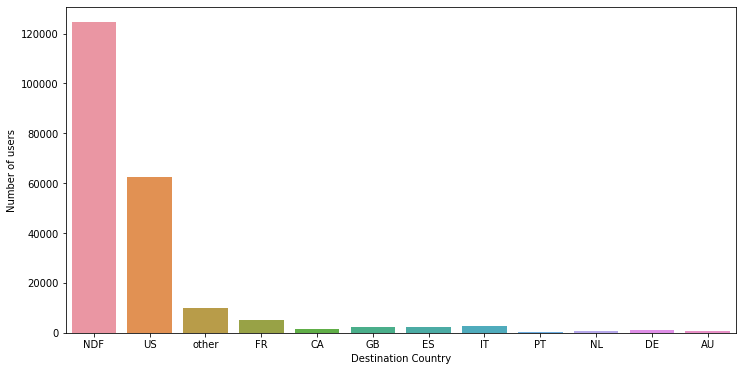

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=data_train)
plt.xlabel('Destination Country')
plt.ylabel('Number of users')

### 合併train、test資料後與欄位增減，目的在於之後一起檢視資料狀態

In [9]:
labels = data_train['country_destination'].values #最後的target 先取出來
data_train = data_train.drop(['country_destination'], axis=1)

In [10]:
#刪ID是因為用不到 ，date first booking是因為空值太多了，直接捨去 
df = pd.concat((data_train, data_test), axis = 0, ignore_index = True)
df = df.drop(['id','date_first_booking'], axis=1)
df.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,2009-03-19 04:32:55,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [11]:
null_in_data(df)

date_account_created            0
timestamp_first_active          0
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
dtype: int64

缺失值加總: 122951 



### 處理缺失值—年齡並視覺化

這裡可以看出未處理的年齡最大值為 2014，最小值為 1，很明顯的有問題。
透過長條圖發現資料分部有明顯的兩個部分，一個是 0-100 歲，另一個是大概 1900-2000+歲，並進一步繪製長條圖看看這兩個區間(0~100 歲長條圖、1900~2000 歲長條圖(每 10 歲為單位))。

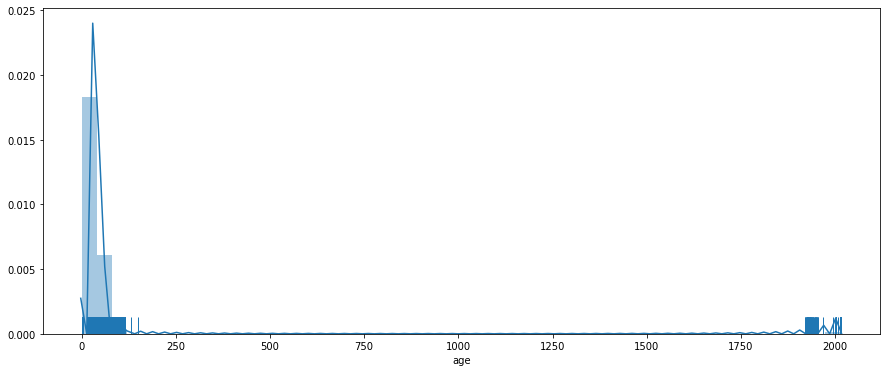

In [12]:
#年齡
plt.figure(figsize = (15 , 6))
sns.distplot(df['age'].dropna() ,rug=True)
#有兩塊比較明顯

In [13]:
df['age'].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

(array([   59.,  2976., 48776., 58598., 24622., 12774.,  6178.,  1457.,
          313.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),
 <a list of 9 Patch objects>)

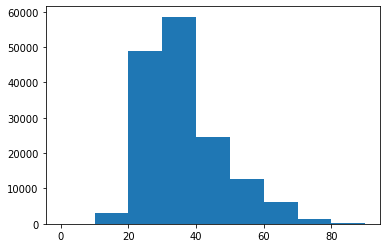

In [14]:
#0-100歲的年齡
bins = [i for i in range(0,100,10)]
plt.hist(df['age'], bins=bins)

(array([ 0.,  0., 27., 23., 14.,  5.,  1.,  0.,  0.]),
 array([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]),
 <a list of 9 Patch objects>)

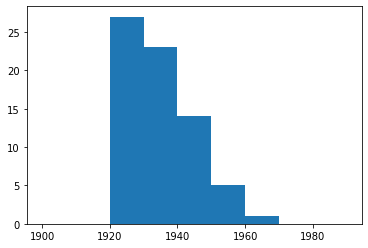

In [15]:
#1900-2000歲的年齡
bins = [x for x in range(1900,2000,10)]
plt.hist(df['age'], bins=bins)

雖然有些年齡例如 1 歲和 2014 歲這種很明顯是亂填的，猜測填入年齡到幾千的也許是誤填成西元出生年，並不是亂填的，看起來蠻有可能是可用的數據。

於是將這幾筆資料轉為實際年齡，做法為選取年齡介於 1900-2000 的 AGE 資料，將 2014 - AGE = 正確年(用 2014 是因為這份資料是2014 年的資料)，再將轉換後的值填回原來的位置。

In [16]:
age = df['age'].values
age = np.where(np.logical_and(age < 2000, age > 1900), 2014-age, age) 
df['age'] = age
#有部分年齡分布在1900-2000，可能不是亂填只是填錯，所以感覺可以將他們轉成正確年齡
#data是2014年的，所以要算出2014那年的真實年齡

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


### 依年齡篩選欲建模資料
縮小訓練的範圍，將年齡限制為 18 歲以上、80 歲以下，原因是範圍以外年齡層使用此平台的比率不高。最後視覺化處理完的年齡分布圖:

In [17]:
df.loc[df['age'] > 80, 'age'] = np.nan
df.loc[df['age'] < 18, 'age'] = np.nan

In [18]:
df.describe()

,age,signup_flow
count,155338.000000,275547.000000
mean,35.904878,4.291965
std,11.269153,8.794313
min,18.000000,0.000000
25%,28.000000,0.000000
50%,33.000000,0.000000
75%,41.000000,1.000000
max,80.000000,25.000000


### 處理不正常的值—性別

性別欄位除了男、女之外，還多了 other 跟 -unknown-，於是將-unknown-轉成 OTHER，並視覺化其結果。

In [19]:
print(df['gender'].unique())
#有四種

['-unknown-' 'MALE' 'FEMALE' 'OTHER']


Text(0, 0.5, 'Number of gender')

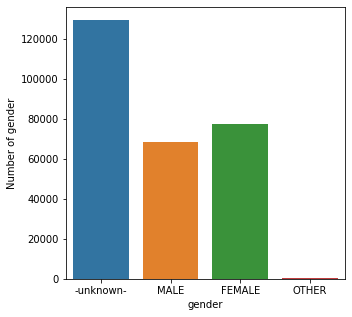

In [20]:
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=df)
plt.xlabel('gender')
plt.ylabel('Number of gender')

Text(0, 0.5, 'Number of gender')

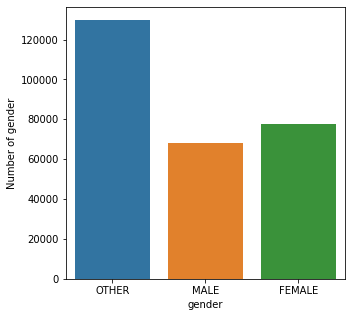

In [21]:
df['gender'].replace('-unknown-','OTHER', inplace=True)
#將unknown也變成other
plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=df)
plt.xlabel('gender')
plt.ylabel('Number of gender')

In [22]:
df.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,2010-06-28,2009-03-19 04:32:55,OTHER,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,2010-09-14,2009-12-08 06:11:05,OTHER,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


### 時間資料的轉換
將 account create 和 first active 兩個欄位拆分成年月日，當作之後要跑演算法的特徵值，並將原本的欄位刪除。

In [23]:
#處理時間 有兩個分別是account create和first active
df['dac_year'] = df.date_account_created.dt.year
df['dac_month'] = df.date_account_created.dt.month
df['dac_day'] = df.date_account_created.dt.day

df['tfa_year'] = df.timestamp_first_active.dt.year
df['tfa_month'] = df.timestamp_first_active.dt.month
df['tfa_day'] = df.timestamp_first_active.dt.day

In [24]:
#已經將時間戳記轉為數值資料，因為後面要fit資料，故將其刪除
df.drop('date_account_created',1, inplace=True)
df.drop('timestamp_first_active',1, inplace=True)

In [25]:
df.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,OTHER,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,2009,3,19
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2009,5,23
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,2009,6,9
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,2009,10,31
4,OTHER,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,2009,12,8


In [26]:
id_test = data_test['id']
#取出test欄位id

### 隨機森林前置—類別型資料轉成數值型資料
這裡使用labelencoder，目的是將資料表裡面的類別型資料轉換成數值型資料。將所有欄位轉換成數據資料後，檢查一下還有剩甚麼欄位有空值資料，剩下年齡欄位還有空值。以所有年齡的平均值以四捨五入取到整數後，將其值填入空值。

In [27]:
labelencoder={}
def labelencoderCustom(df,col,labelencoder={}):
    if col not in labelencoder:
        labelencoder[col] = {}
    result = []
    for i in df:
        if i not in labelencoder[col]:
            labelencoder[col][i] = len(labelencoder[col])+1
            result.append(labelencoder[col][i])
        else:
            result.append(labelencoder[col][i])
    return result,labelencoder
#定義labelencoderCustom函數，將train資料的非數值資料轉成數值

In [28]:
for col in df.columns:
    if df[col].dtypes == object :
        df[col],labelencoder = labelencoderCustom(df[col].values,col,labelencoder)
#         train[col],labelencoder = labelencoderCustom(train[col].values,col,labelencoder)
#         test[col],labelencoder =  labelencoderCustom(test[col].values,col,labelencoder)
#用labelencoderCustom將非數值資料轉為數值資料

In [29]:
null_in_data(df)
#剩下年齡有空值

gender                          0
age                        120209
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked         0
signup_app                      0
first_device_type               0
first_browser                   0
dac_year                        0
dac_month                       0
dac_day                         0
tfa_year                        0
tfa_month                       0
tfa_day                         0
dtype: int64

缺失值加總: 120209 



In [30]:
#以平均值四捨五入到整數填入
floor_age = round(df['age'].mean())
df = df.fillna(floor_age)

In [31]:
df.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,1,36.0,1,0,1,1,1,1,1,1,1,2010,6,28,2009,3,19
1,2,38.0,1,0,1,2,2,1,1,1,1,2011,5,25,2009,5,23
2,3,56.0,2,3,1,1,1,1,1,2,2,2010,9,28,2009,6,9
3,3,42.0,1,0,1,1,1,1,1,1,3,2011,12,5,2009,10,31
4,1,41.0,2,0,1,1,1,1,1,1,1,2010,9,14,2009,12,8


In [32]:
count_train = data_train.shape[0]
X_train = df.values[:count_train]
X_test = df.values[count_train:]

### 使用隨機森林進行預測

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=200,criterion='gini')
rf = rf.fit(X_train,labels)

In [36]:
prediction = rf.predict(X_test)
#用作好的模型預測

In [37]:
sample_submission = {}
sample_submission['id'] = id_test
sample_submission['country'] = prediction
#將從test抓取的id資料存到sample_submission
#將用隨機森林fit的資料，來預測country
s = pd.DataFrame.from_dict(sample_submission)
s.to_csv('rf_sub.csv',index=False)
#用隨機森林演算法，將資料匯出成csv檔

### 使用Xgboost進行預測

In [38]:
from xgboost.sklearn import XGBClassifier

In [39]:
le = LabelEncoder()
y = le.fit_transform(labels) #目標值為countries

In [40]:
xgb = XGBClassifier(max_depth=5, learning_rate=0.3, n_estimators=22,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0)               
xgb.fit(X_train, y)
y_pred = xgb.predict_proba(X_test) 

In [41]:
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(y_pred[i])[::-1])[:5].tolist()

# #Generate submission
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('xgb_sub.csv',index=False)

### Reference
1. Predict Where a New User Will Book Their First Travel Experience
https://towardsdatascience.com/predict-where-a-new-user-will-booktheir-first-travel-experience-e6c9ada67cf4
2. Python notebook using data from Airbnb New User Bookings
https://www.kaggle.com/justk1/airbnb
3. XGBOOST—eXtreme Gradient Boosting 演算法原理
https://www.itread01.com/content/1549394484.html
4. 【Python 數據分析基礎】:數據缺失值處理| 程式前沿      
https://zhuanlan.zhihu.com/p/40775756
5. 機器學習演算法（六）XGBoost 演算法
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/563049